In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Predicted values:
[0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0
 0 1 1 0 1 0]
Confusion Matrix:  [[201  56]
 [ 50 143]]
Accuracy :  76.44444444444

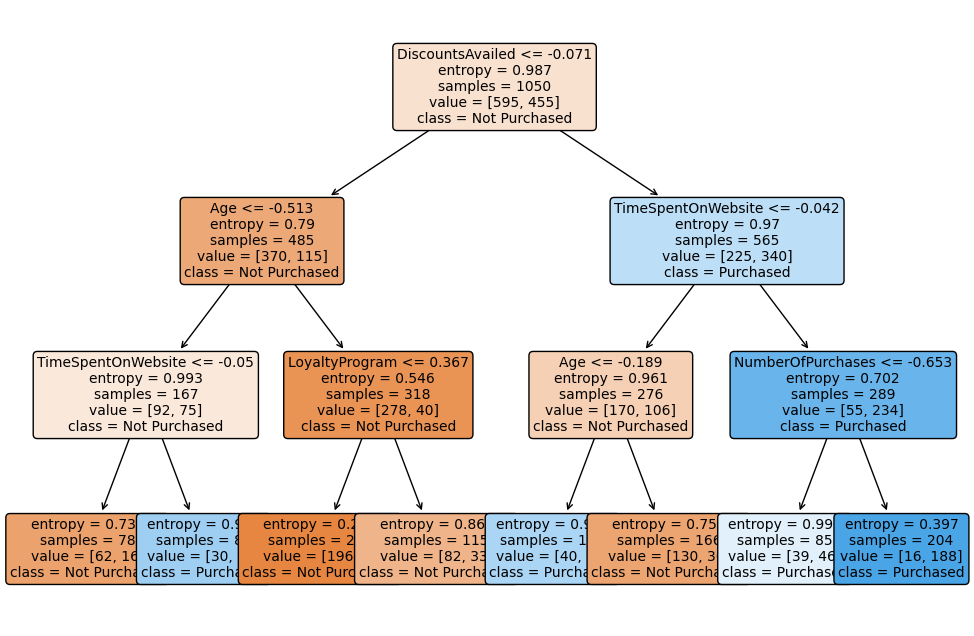

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from xgboost import plot_tree
file_path="/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv"

pc=pd.read_csv(file_path)
features=['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']
X=pc[features]
y= pc.PurchaseStatus
X_train,X_test,y_train,y_test= train_test_split(X, y,test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)
pc_model =DecisionTreeClassifier(random_state=0)
pc_model.fit(X_train,y_train)
def train_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))
clf_entropy = train_using_entropy(X_train, X_test, y_train)
y_pred = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred)
def plot_decision_tree(clf):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Purchased', 'Purchased'], rounded=True, fontsize=10)
    plt.show()

plot_decision_tree(clf_entropy)


